In [1]:
import pandas as pd
import numpy as np

#Make numpy values easier to read
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers # type: ignore

In [2]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

đọc file data

In [3]:
train_dataset = pd.read_csv("./Data/A_Z Handwritten Data.csv")
num_train_dataset = train_dataset.shape[0]

thông tin data

In [4]:
print(f"Number of training data: {num_train_dataset}")
train_dataset.head()

Number of training data: 372450


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_dataset.shape

(372450, 785)

label

In [6]:
train_dataset.rename(columns={'0':'label'}, inplace=True)

In [7]:
train_y = train_dataset['label'].astype('float32')
train_x = train_dataset.drop(['label'],axis = 1).astype('int32')
train_x.shape, train_y.shape

((372450, 784), (372450,))

label encoding

In [8]:
encode = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

ảnh đầu tiên

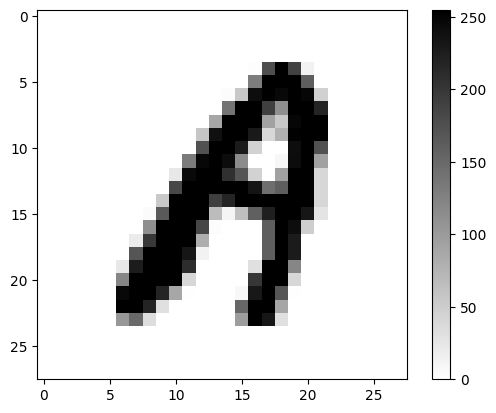

In [9]:
# Take 1 image and reshaping
image = train_x.loc[0]
image = image.to_numpy().reshape(28, 28)

# Plot the image - a sample handwritting
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

hiển thị 25 ảnh đầu

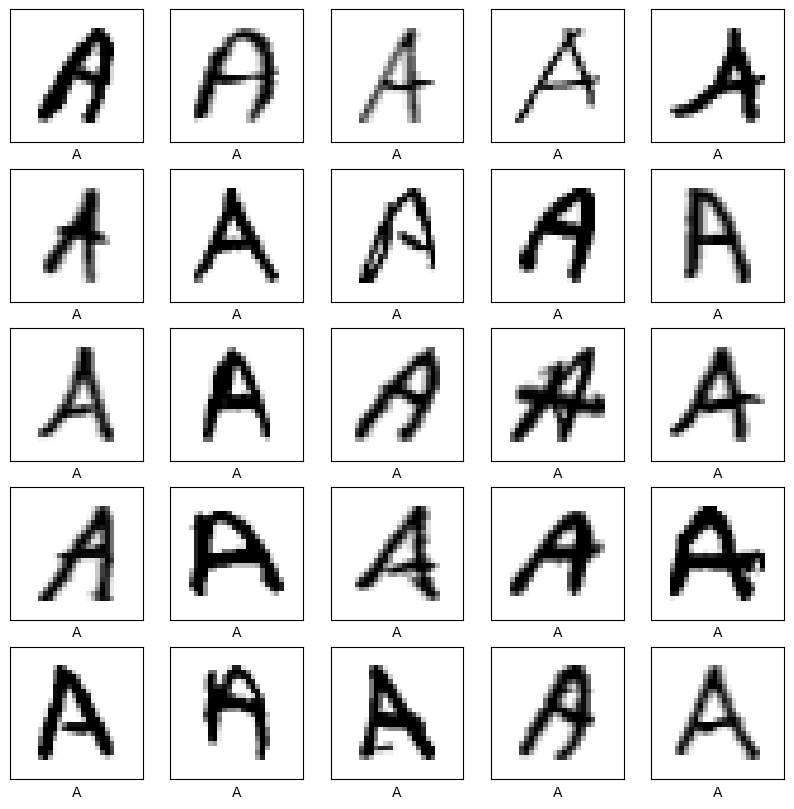

In [10]:
# change the range to see more!
plt.figure(figsize=(10,10))
for i in range(25):
    image = train_x.loc[i].to_numpy().reshape(28, 28)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(encode[int(train_y[i])])
plt.show()

In [11]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore

tham số model

In [12]:
TEST_SIZE = 0.2 

BATCH_SIZE = 50
IMG_SHAPE  = 28 
EPOCHS     = 10

chuẩn bj dữ liệu

In [13]:
print(type(train_x))

<class 'pandas.core.frame.DataFrame'>


chia dữ liệu thành tập train test val

In [14]:
train_x,val_x,train_y,val_y = train_test_split(train_x,train_y,test_size=TEST_SIZE)
val_x,test_x,val_y,test_y = train_test_split(val_x,val_y,test_size=TEST_SIZE)

In [15]:
train_x = train_x.values.reshape(-1,28,28,1)
train_x = train_x / 255.0

val_x = val_x.values.reshape(-1,28,28,1)
val_x = val_x / 255.0

test_x = test_x.values.reshape(-1,28,28,1)
test_x = test_x / 255.0

train_x.shape, val_x.shape, test_x.shape

((297960, 28, 28, 1), (59592, 28, 28, 1), (14898, 28, 28, 1))

One-hot encoding

In [16]:
train_y = tf.keras.utils.to_categorical(train_y,26)
val_y = tf.keras.utils.to_categorical(val_y,26)
test_y = tf.keras.utils.to_categorical(test_y,26)

train_y.shape, val_y.shape, test_y.shape

((297960, 26), (59592, 26), (14898, 26))

In [17]:
print(train_y[0:5,:])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0.]]


# Data augmentation

thêm dữ liệu cho train

In [18]:
train_x.shape

(297960, 28, 28, 1)

In [19]:
type(train_x)

numpy.ndarray

In [20]:
image_gen_train = ImageDataGenerator(
        rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 30)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # not randomly flip images
        vertical_flip=False)  # not randomly flip images

image_gen_train.fit(train_x)

In [21]:
train_data_gen=image_gen_train.flow(train_x,train_y, batch_size=BATCH_SIZE)

In [22]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

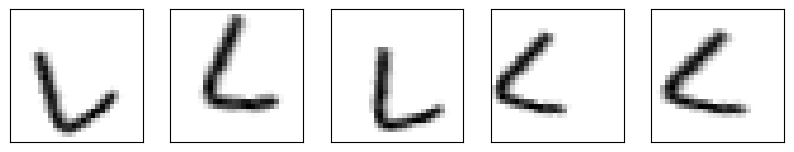

In [23]:
# change the range to see more!
plt.figure(figsize=(10,10))
for i in range(5):
    image = augmented_images[i].reshape(28, 28) 
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
plt.show()

thêm dữ liệu cho validation

In [24]:
image_gen_val = ImageDataGenerator(
        horizontal_flip=False,  # not randomly flip images
        vertical_flip=False)  # not randomly flip images

image_gen_train.fit(val_x)

In [25]:
val_data_gen=image_gen_val.flow(val_x,val_y, batch_size=BATCH_SIZE)

model

In [26]:
# Defining the model
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="Same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(26, activation="softmax")
    ]
)
model.summary()

c:\Users\HELLO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 359,674 (1.37 MB)

 Trainable params: 359,354 (1.37 MB)

 Non-trainable params: 320 (1.25 KB)

xử lý early stopping

In [27]:
EPOCHS_COUNT = 0

In [28]:
#Defining the callback function to stop our training once the acceptable accuracy is reached
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            global EPOCHS_COUNT
            EPOCHS_COUNT = epoch
            if(logs.get('accuracy') > 0.999):
                print("\nReached 99.9% accuracy so cancelling training!")
                self.model.stop_training = True

callbacks = myCallback()

compile model

In [29]:
#Compiling and model training with batch size = 50, epochs = 20, and optimizer = adam
Optimizer = tf.keras.optimizers.Adam(
            learning_rate=0.0005, 
            beta_1=0.9, 
            beta_2=0.999, 
            epsilon=1e-07,
            name='Adamax'
)
model.compile(optimizer=Optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
tf.shape(train_y)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([297960,     26])>

train model

In [31]:
history = model.fit(train_data_gen, 
                    validation_data = val_data_gen,
                    epochs = EPOCHS, 
                    callbacks=[callbacks])

Epoch 1/10


c:\Users\HELLO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5960/5960 ━━━━━━━━━━━━━━━━━━━━ 836s 138ms/step - accuracy: 0.8681 - loss: 0.4602 - val_accuracy: 0.9785 - val_loss: 0.0777
Epoch 2/10
5752/5960 ━━━━━━━━━━━━━━━━━━━━ 28s 137ms/step - accuracy: 0.9663 - loss: 0.1157

trực quan hóa kết quả huấn luyện

In [ ]:
EPOCHS_COUNT

9

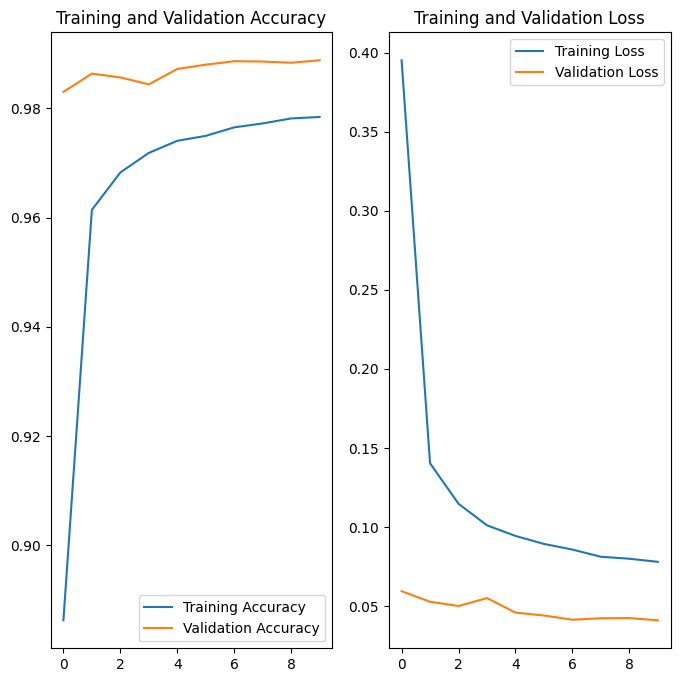

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS_COUNT+1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

save model

In [ ]:
model.save('./PredictImage/static/models/model_detect_image_with_augmentation.keras')
model.save('model_detect_image_with_augmentation.keras')

dự đoán

In [ ]:
results = model.predict(test_x)
predicted_test_labels = np.argmax(results,axis = 1)
print(predicted_test_labels)

466/466 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step
[12  1 11 ... 20 19 20]


dự đoán ảnh đầu tiên trong bộ test

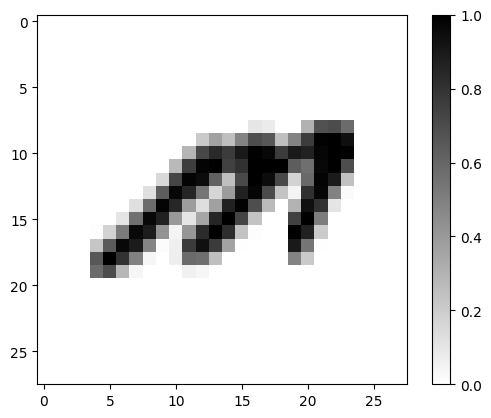

In [ ]:
# Take 1 image and reshaping
image = test_x[0]
image = image.reshape(28, 28)

# Plot the image
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
print(encode[predicted_test_labels[0]])

M


so sánh kết quả

In [ ]:
test_labels = np.argmax(test_y,axis = 1)

In [ ]:
print(encode[test_labels[0]])

M


25 ảnh đầu tiên bộ test

25 ảnh với label bộ test

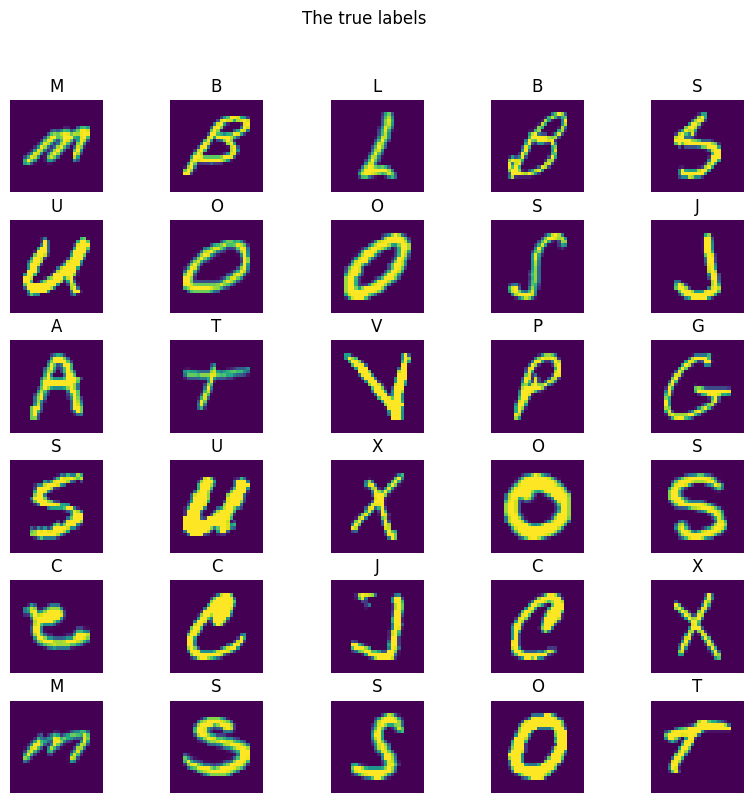

In [ ]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)

  image = test_x[n].reshape(28, 28)
  plt.imshow(image)
  plt.title(encode[test_labels[n]])
  plt.axis('off')
_ = plt.suptitle("The true labels")

25 ảnh với kết quả dự đoán của model

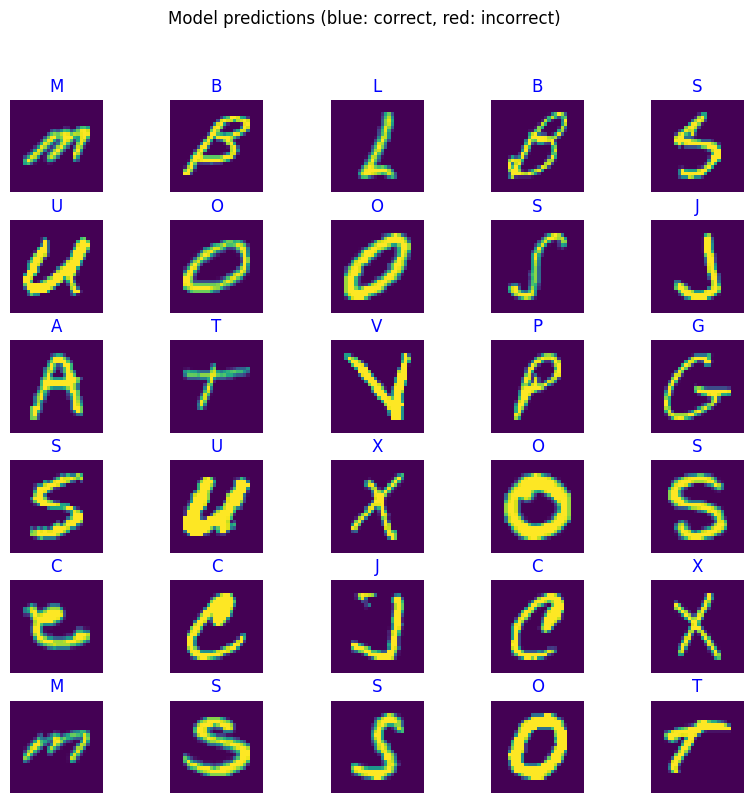

In [ ]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)

  image = test_x[n].reshape(28, 28)
  plt.imshow(image)
  color = "blue" if predicted_test_labels[n] == test_labels[n] else "red"
  plt.title(encode[predicted_test_labels[n]], color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

đánh giá

In [ ]:
loss, acc = model.evaluate(test_x, test_y)
print("Model accuracy: {:5.2f}%".format(100*acc))

466/466 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9866 - loss: 0.0463
Model accuracy: 98.74%


Confusion matrix

466/466 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step


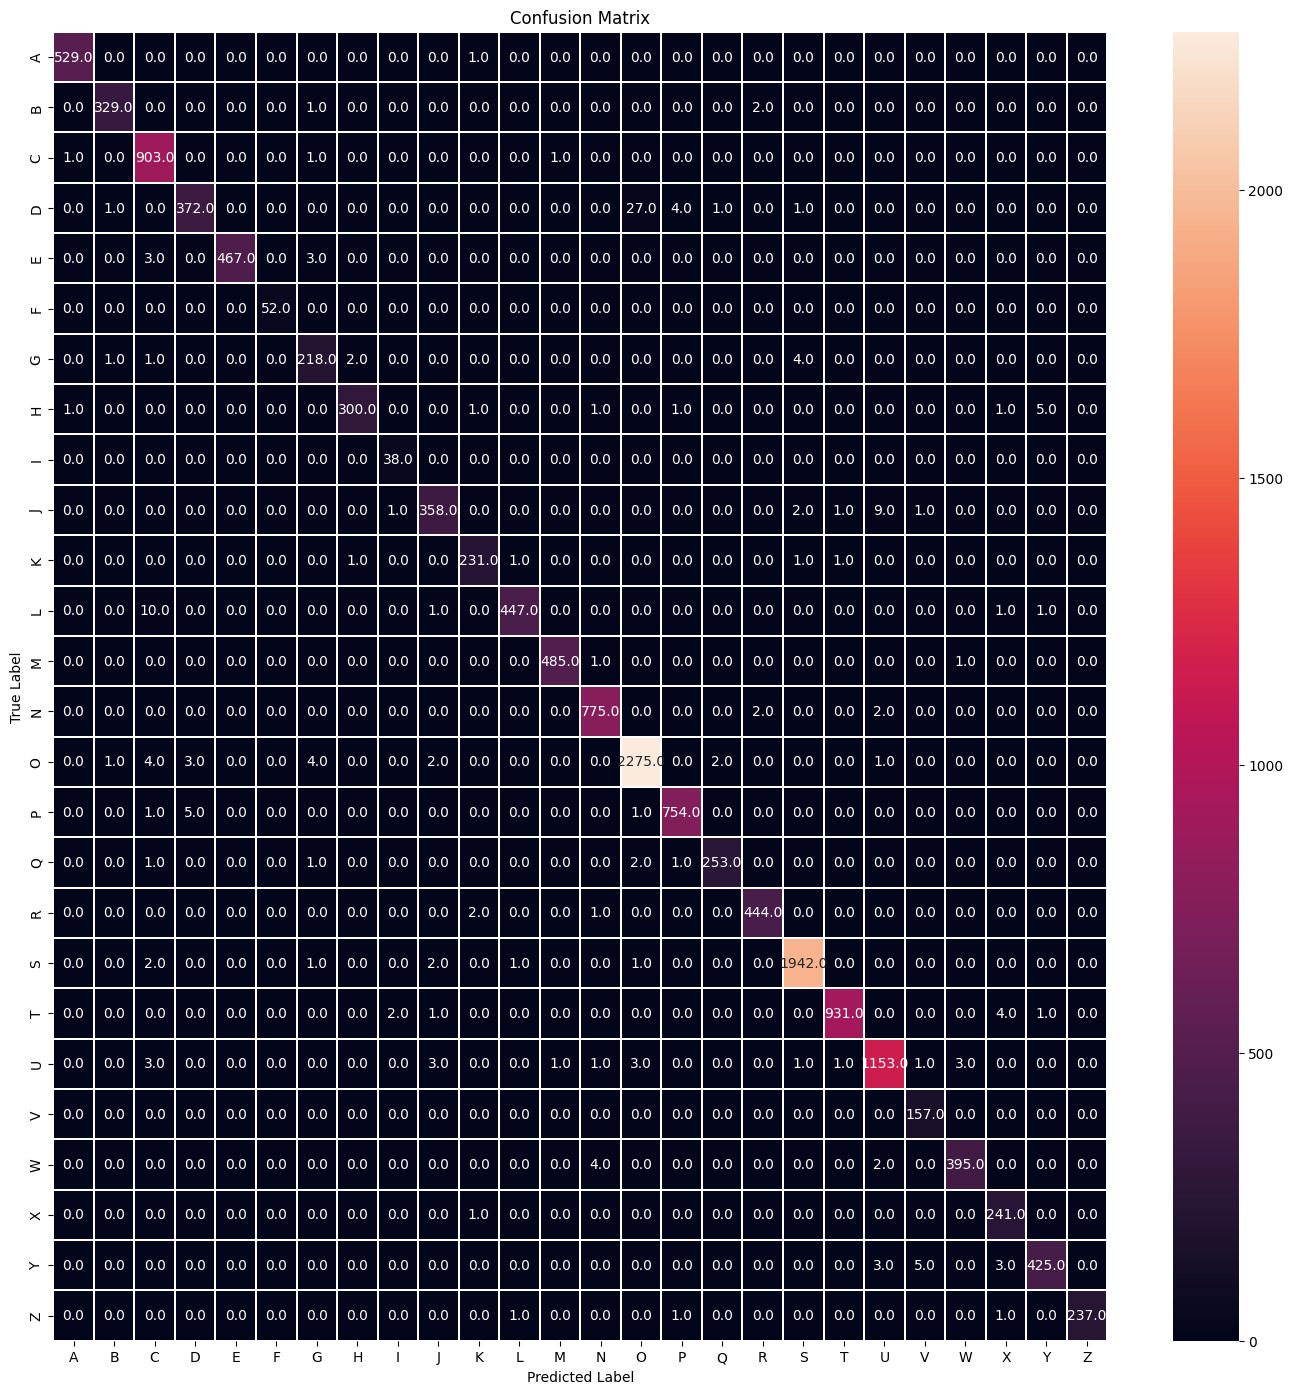

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(test_x)
y_pred_classes = np.argmax(y_pred, axis=1)
y_answer = np.argmax(test_y, axis=1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_answer, y_pred_classes)
# plot the confusion matrix
f, ax = plt.subplots(figsize=(17, 17))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, fmt='.1f', ax=ax, xticklabels=list(encode.values()), yticklabels=list(encode.values()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# test data thực tế

In [ ]:
filename = "./Data/test/a_test.png"

In [ ]:
from PIL import Image
image_ = Image.open(filename)
image_ = np.array(image_.convert("L").resize((28, 28))).astype(np.float32).reshape(28, 28, 1)/255

tiền xử lý ảnh đầu vào

In [ ]:
x_ = np.array([image_])

ảnh sau khi xử lý

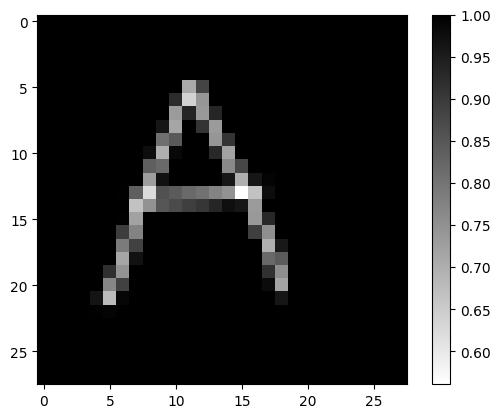

In [ ]:
# Take 1 image and reshaping
image = x_
image = image.reshape(28, 28)

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
predict = model.predict(x_)
predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.005, 0.034, 0.155, 0.018, 0.149, 0.002, 0.022, 0.007, 0.001,
        0.024, 0.007, 0.013, 0.028, 0.077, 0.177, 0.012, 0.018, 0.011,
        0.026, 0.008, 0.126, 0.008, 0.03 , 0.004, 0.011, 0.027]],
      dtype=float32)

In [ ]:
predict = model.predict(x_)
label = np.argmax(predict,axis = 1)
encode[label[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


'O'

trưc quan hóa dự đoán

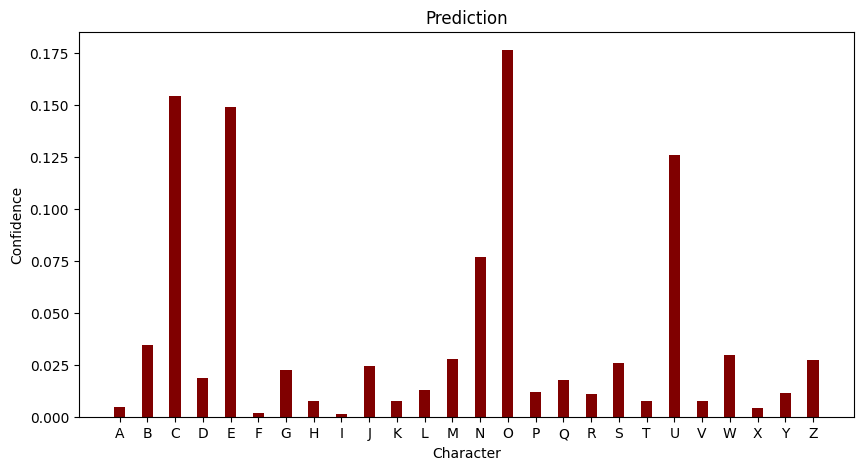

In [ ]:
# Visualize the predict result
x = list(encode.values())
y = list(predict.flatten())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(x, y, color ='maroon',
        width = 0.4)

plt.xlabel("Character")
plt.ylabel("Confidence")
plt.title("Prediction")
plt.show()